### Prediction using Decision Tree  Algorithm

### Executive by: Debanka Das

### #Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### #Reading of Iris data

In [2]:
df=pd.read_csv(r"Iris.csv")

### #Displaying Data 

In [3]:
df.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [4]:
df.tail()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica

### #Checking size of Full data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.describe()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000

In [8]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

### #Check unique values

In [10]:
df.nunique()

#unique- will say about unique values
#nunique- will say how many number of unique values

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

### #Drop the value of ID from the dataset

In [11]:
df.drop('Id',axis=1,inplace=True)

In [12]:
df.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa

In [13]:
df.min()

SepalLengthCm            4.3
SepalWidthCm               2
PetalLengthCm              1
PetalWidthCm             0.1
Species          Iris-setosa
dtype: object

In [14]:
df.max()

SepalLengthCm               7.9
SepalWidthCm                4.4
PetalLengthCm               6.9
PetalWidthCm                2.5
Species          Iris-virginica
dtype: object

### #Visualising the data

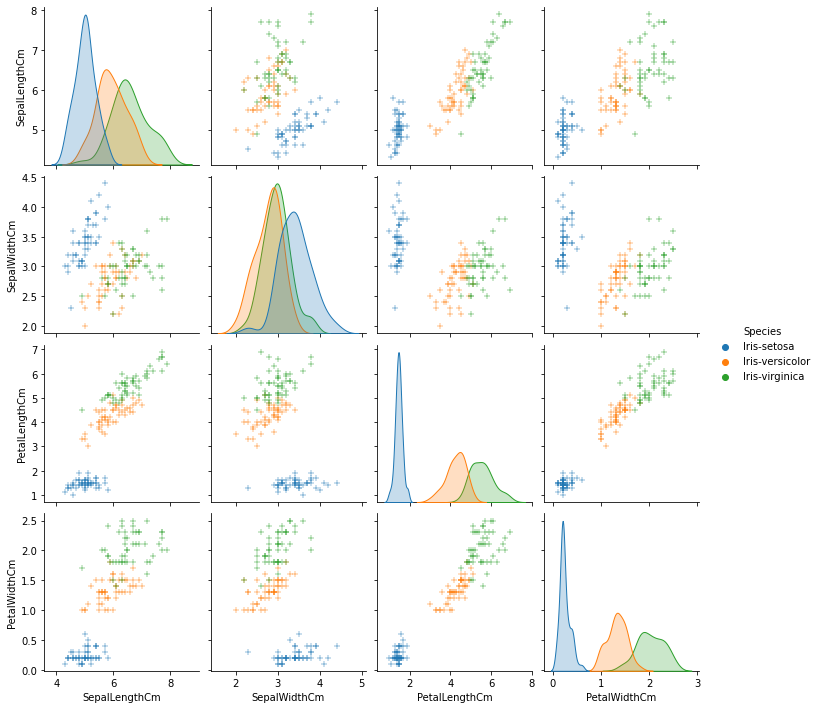

In [18]:
a=sns.pairplot(df, hue='Species', markers='+')
plt.show()

In [19]:
df.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa

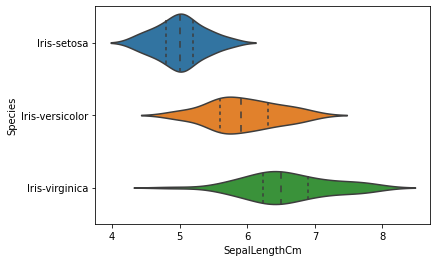

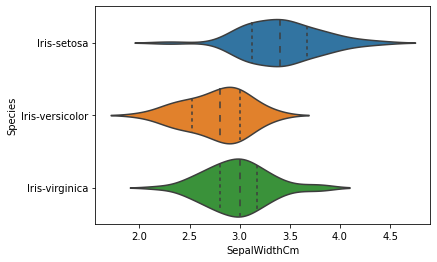

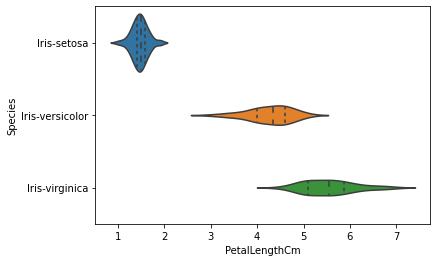

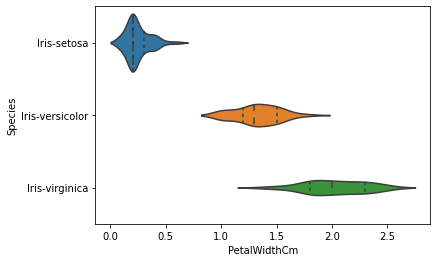

In [20]:
a = sns.violinplot(y='Species', x='SepalLengthCm', data=df, inner='quartile')
plt.show()
a = sns.violinplot(y='Species', x='SepalWidthCm', data=df, inner='quartile')
plt.show()
a = sns.violinplot(y='Species', x='PetalLengthCm', data=df, inner='quartile')
plt.show()
a = sns.violinplot(y='Species', x='PetalWidthCm', data=df, inner='quartile')
plt.show()

### #Now let's us bulid a classifier which can predict survival creating train and test data sets using accent y variables

In [21]:
# List of variables to map

varlist =  ['Species']

# Defining the map function
def binary_map(x):
    return x.map({'Iris-setosa': 0, 'Iris-virginica': 1,'Iris-versicolor': 2})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [22]:
from sklearn.model_selection import train_test_split

used_features =["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm","Species"]

x = df[used_features].values
y = df["Species"]

In [23]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.3,random_state=1)

In [24]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 5)
(45, 5)
(105,)
(45,)


In [25]:
df.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0            5.1           3.5            1.4           0.2        0
1            4.9           3.0            1.4           0.2        0
2            4.7           3.2            1.3           0.2        0
3            4.6           3.1            1.5           0.2        0
4            5.0           3.6            1.4           0.2        0

In [26]:
df.tail()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
145            6.7           3.0            5.2           2.3        1
146            6.3           2.5            5.0           1.9        1
147            6.5           3.0            5.2           2.0        1
148            6.2           3.4            5.4           2.3        1
149            5.9           3.0            5.1           1.8        1

### #Creating the model

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

### #Build a decision tree classifier & also print the confusion matrix

In [28]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [29]:
#Import descision tree classifier from sk learn library
from sklearn.tree import DecisionTreeClassifier

#Fitting the decession tree with default hyperparameters,apart from 
#max_depth which is 5 so that we can plot and read the tree

dt_default=DecisionTreeClassifier(max_depth=15)

In [30]:
# Fiting on Train data
dt_default.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=15)

In [31]:
#lets check the evaluation metrics of our default model

#Importing classification report and confusion matrix from sklearn metrics

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn import tree

#Making predictions
y_pred_default=dt_default.predict(x_test)

#Printing classification report
print(classification_report(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        18

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [32]:
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[16  0  0]
 [ 0 11  0]
 [ 0  0 18]]
1.0


### TASK_COMPLETED